In [93]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import datetime
import glob

import os
# import cPickle as pickle

import seaborn as sns
sns.set_style("whitegrid")

In [94]:
more_walkable_df = pd.read_csv("../data/minute_level_more_walkable.csv")
less_walkable_df = pd.read_csv("../data/minute_level_less_walkable.csv")
sim_walkable_df = pd.read_csv("../data/minute_level_sim_walkable.csv")

In [110]:
scale = 1.
a_fsize = c_fsize = 16
def plot_df(diff_plot_df, bin_size=5, min_steps_per_min=15, 
            ylim=(-scale, scale), day_group=7, ax=None, 
            axis_fontsize=a_fsize, category_fontsize=c_fsize, axis_every=3):
    def convert_properly(value):
        return (value - min_steps_per_min) / bin_size
    
    if ax is None:
        f, ax = plt.subplots(figsize=(20,10))
    
    ax.grid(False)
    ax.axhline(y=0, color='k', linewidth=1.0)
    ax.axvline(x=convert_properly(100), linestyle="--", color='k', linewidth=1)
    ax.axvline(x=convert_properly(130), linestyle="--", color='k', linewidth=1)
    ax.axvspan(-10, convert_properly(100), alpha=0.1, color='yellow')
    ax.axvspan(convert_properly(100), convert_properly(130), alpha=0.1, color='green')
    ax.axvspan(convert_properly(130), convert_properly(200), alpha=0.2, color='darkgreen')
    
    from matplotlib.transforms import blended_transform_factory
    tform = blended_transform_factory(ax.transData, ax.transAxes)
    ax.text(convert_properly(50), 0.05, 'Light', transform=tform, ha='center', color='k', fontsize=category_fontsize)
    ax.text(convert_properly(115), 0.05, 'Moderate', transform=tform, ha='center', color='k', fontsize=category_fontsize)
    ax.text(convert_properly(165), 0.05, 'Vigorous', transform=tform, ha='center', color='k', fontsize=category_fontsize)
    
    int_plus_color = '#1f78b4'
    int_minus_color = '#de1b1b'
    colors = [int_plus_color if _y >= 0 else int_minus_color for _y in diff_plot_df['difference']]
    sns.barplot(x='steps_per_min_bin', y='difference', data=diff_plot_df, palette=colors, ax=ax)
    
    def no_bracket_left(string):
        if '[' in string: 
            string = string.replace('[', '')
        if ']' in string: 
            string = string.replace(']', '')
        if '(' in string: 
            string = string.replace('(', '')
        if ')' in string: 
            string = string.replace(')', '')
        
        return string.split(',')[0]
    
    a = [no_bracket_left(val.get_text()) for val in ax.xaxis.get_ticklabels()]
    ax.xaxis.set_ticklabels(a)

    for idx, label in enumerate(ax.xaxis.get_ticklabels()):
        if idx % axis_every != 0:
            label.set_visible(False)
    
    ax.set_xlabel('Intensity (Steps / Minute)')
    ax.set_ylabel('Minutes Added\nper Person and Week')
    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(axis_fontsize)
    
    if ylim is not None:
        ax.set_ylim(bottom=day_group*ylim[0], top=day_group*ylim[1]);

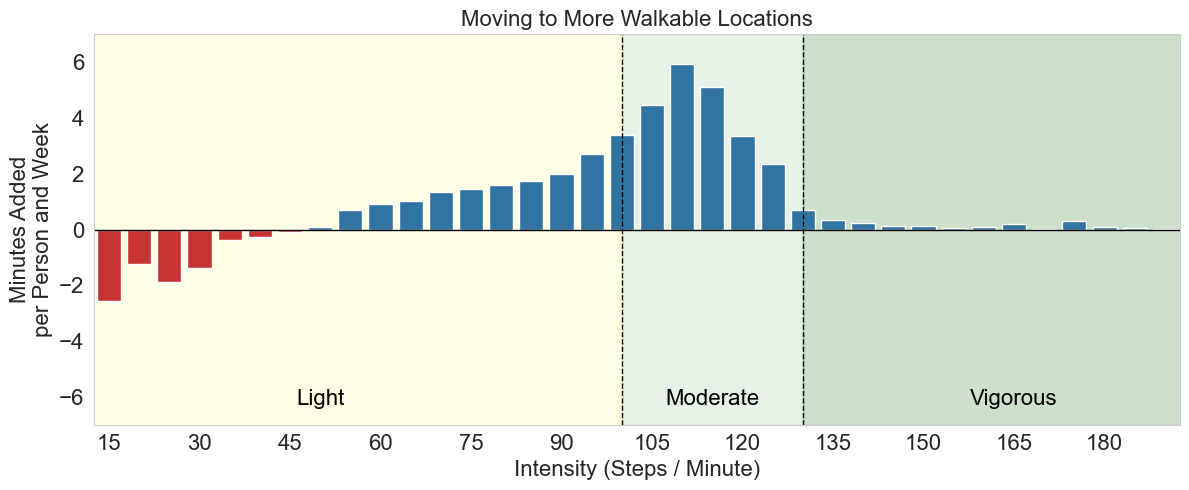

In [111]:
fig, ax = plt.subplots(figsize=(12, 5));
plot_df(more_walkable_df, ax=ax)
ax.set_title('Moving to More Walkable Locations', fontdict={'fontsize': a_fsize})
fig.tight_layout()
fig.savefig("../output/fig3a.pdf", dpi=300);

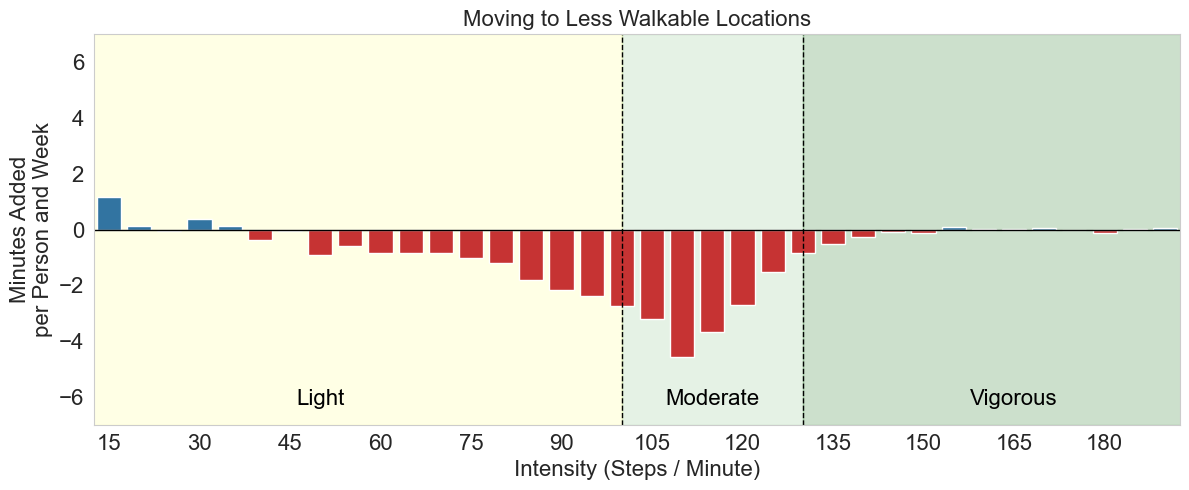

In [112]:
fig, ax = plt.subplots(figsize=(12, 5));
plot_df(less_walkable_df, ax=ax)
ax.set_title('Moving to Less Walkable Locations', fontdict={'fontsize': a_fsize})
fig.tight_layout()
fig.savefig("../output/fig3b.pdf", dpi=300);

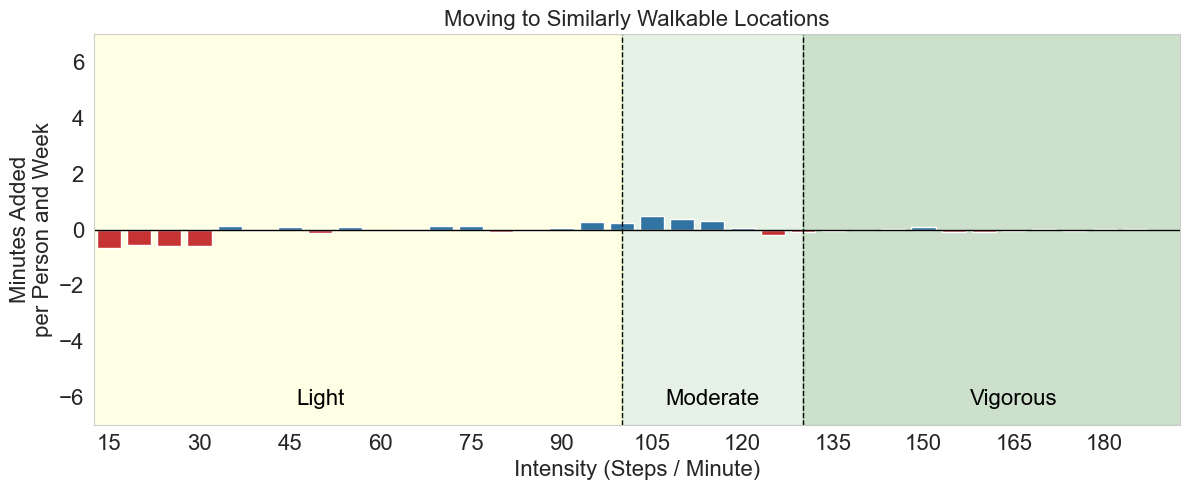

In [113]:
fig, ax = plt.subplots(figsize=(12, 5));
plot_df(sim_walkable_df, ax=ax)
ax.set_title('Moving to Similarly Walkable Locations', fontdict={'fontsize': a_fsize})
fig.tight_layout()
fig.savefig("../output/fig3c.pdf", dpi=300);